# Student Math Report

In [404]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesClassifier

This is a data regarding the student achievement in secondary education of two Protuguese schools. From the data, we want to learn what affects the final grade (G3) and what potentially affects their attendence in school. 
- For the regression on grades, we will be using simple linear regression first to analyize the relationship with other variables. 
- For the absences, we will be using Generalized Linear Model Poisson Regression since the absences can be categorized as a count data.  

In [383]:
df = pd.read_csv ('/Users/frankhung/Documents/FHDocument/2020Summer/Projects/Student_Regression/student/student-mat.csv', sep = ';')
print('Number of rows: ',df.shape[0],'\nNumber of columns: ',df.shape[1])
df.dropna()

Number of rows:  395 
Number of columns:  33


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


By using shape function, we can know the shape of the data that we are using. In this case, there are 395 observations with 33 variables.

In [84]:
df.shape

(395, 33)

Since we want to find the relationship between G3 and other variables, we will find statistics on G3 and demographic information. 

In [384]:
df[['age', 'absences', 'G1', 'G2', 'G3']].describe()

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924,10.415190
std,1.276043,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


Here, we need to assess the type of each variable since we need to change some of them are categorical variable in object type. 

In [86]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Find the relationship among G1, G2, and G3 to see if the grades for each semester are correlated. From the below graphs, we can see that each of them are highly correlated. 

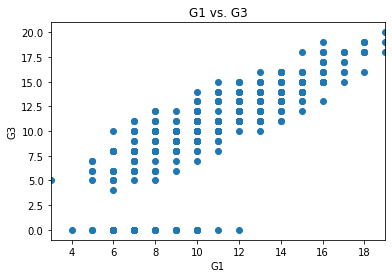

In [87]:
df.plot(x = 'G1', y = 'G3', style = 'o')
plt.title('G1 vs. G3')
plt.xlabel('G1')
plt.ylabel('G3')
plt.legend().remove()

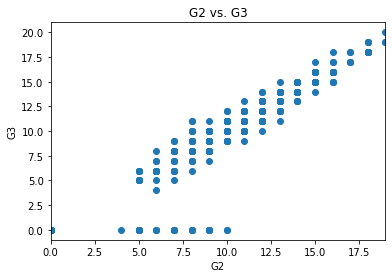

In [88]:
df.plot(x = 'G2', y = 'G3', style = 'o')
plt.title('G2 vs. G3')
plt.xlabel('G2')
plt.ylabel('G3')
plt.legend().remove()
plt.show()

In [ ]:
df.plot(x = 'G1', y = 'G2', style = 'o')
plt.title('G1 vs. G2')
plt.xlabel('G1')
plt.ylabel('G2')
plt.legend().remove()
plt.show()

Since G1 and G2 are positively correlated with G3, we want to analyze what factors could potentially affect student's grades in their third semester. From the distribution of G3, we can see that it is approximately normal with a few outliers who scored 0 on their math test. 

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['G3'])

Also, we want to what contribute to student's attendance. By plotting the absences' data out, we can see that it follows poisson distribution and it is a counting variable. 

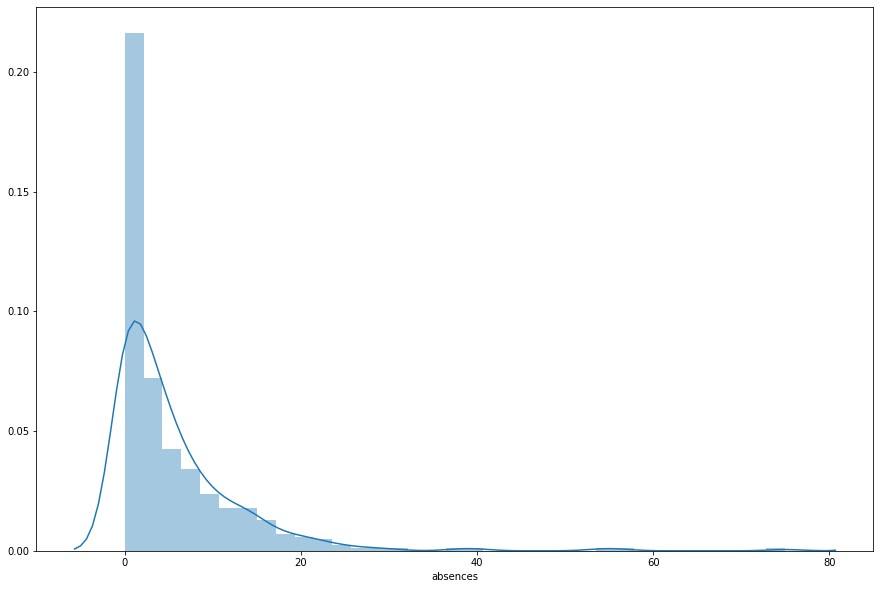

In [92]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['absences'])

We can see from the heat graph the correlation between each variable. We are especially interested in G3, thus we will pick out the ones that are relatively dark red. 

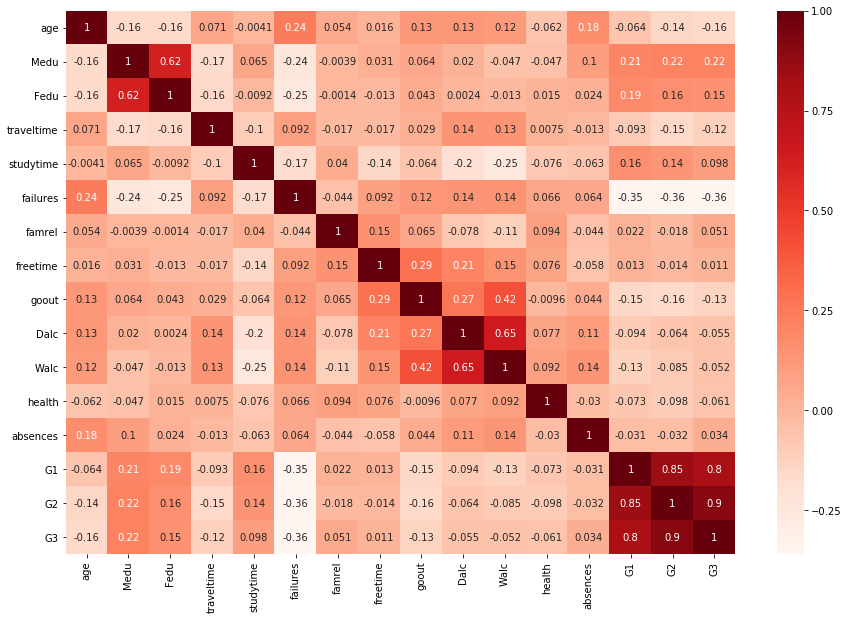

In [93]:
# Using Peason Correlation
plt.figure(figsize=(15,10))
cor = df.corr()
seabornInstance.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

Here, we attempt to find a threshold for the correlation value. From the filtering result, it seems like only G1 and G2 have high correlation with G3. However, we will continue to use other methods to find a better variable to use. 

In [96]:
# Correlation with the dependent variable
cor_target = abs(cor["G3"])
# Selecting highly correlated features
features = cor_target[cor_target>0.3]
features

failures    0.360415
G1          0.801468
G2          0.904868
G3          1.000000
Name: G3, dtype: float64

In [419]:
df2 = df
for column in df2.columns:
    if df2[column].dtype == object:
        dummyCols = pd.get_dummies(df2[column], prefix = column)
        df2 = df2.join(dummyCols)
        del df2[column]
X = df2
del X['G3']
y = np.ravel(df.iloc[:,-1])

Here, we want to sepearte the processed data into training set and test set. From the $R^2$ and cross-validation results, we can know that it is a bad idea to fit everything against G3 since the value is extremely small. 

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lm = linear_model.LinearRegression()
model =lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.7881448405756537

In [421]:
df_cv = X_train.join(pd.DataFrame(y_train))
scores = cross_val_score(lm, X_train, y_train, cv=6)
scores

array([0.80682826, 0.77408869, 0.7673531 , 0.78123099, 0.80399541,
       0.78900089])

Thus, we are going to use Extra Trees Classifier to find the first 10 variables and use forward selection on the variables to find the best fit. 

[0.02713898 0.02480401 0.02570615 0.02014643 0.0241935  0.01740311
 0.02543332 0.02514325 0.02611318 0.01763618 0.02771544 0.02559372
 0.03745531 0.0660022  0.09613948 0.00755999 0.00790693 0.01525476
 0.01571893 0.01149376 0.0117839  0.01486475 0.01702828 0.01016601
 0.00907374 0.01210388 0.00839218 0.01539519 0.01546706 0.0121971
 0.00515833 0.00435656 0.0186493  0.01668694 0.00629408 0.01807439
 0.01454895 0.00788431 0.01643926 0.01226953 0.01378771 0.00777027
 0.00761822 0.00851967 0.01564562 0.01436084 0.01342342 0.01335695
 0.01609999 0.01677293 0.01258723 0.01319413 0.00404944 0.0037705
 0.01176704 0.0109512  0.0118967  0.01303579]


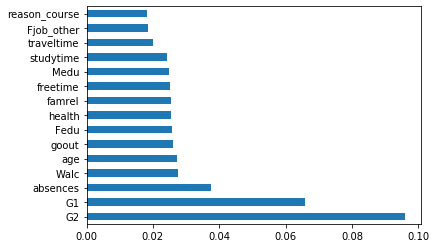

In [422]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

From the above chart, we can see that G1 and G2 have the highest corrlation and absences comes next. For this regression, we are going to regress G3 with the 10 highest correlation value. The $R^2$ shows that the fit improves a lot, which it explains 79% of the data. 

In [412]:
df3 = df[['G1', 'G2', 'absences', 'age', 'goout', 'Walc', 'freetime', 'Fedu', 'Medu', 'health']]
for column in df3.columns:
    if df3[column].dtype == object:
        dummyCols = pd.get_dummies(df3[column], prefix = column)
        df3 = df3.join(dummyCols)
        del df3[column]
X = df3
y = np.ravel(df.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lm = linear_model.LinearRegression()
model =lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.796506427527759

Next, we will use K-fold cross-validation score with K=6 to examine the training of the model. From the results, we can see that it has a normal fit. 

In [282]:
df_cv = X_train.join(pd.DataFrame(y_train))
scores = cross_val_score(lm, X_train, y_train, cv=6)
scores

array([0.81375539, 0.84156407, 0.79724749, 0.798778  , 0.84178451,
       0.84249318])

After adding one more variable 'famrel', the fit increased. 

In [425]:
df4 = df[['G1', 'G2', 'absences', 'age', 'goout', 'Walc', 'freetime', 'Fedu', 'Medu', 'health', 'famrel']]
for column in df4.columns:
    if df4[column].dtype == object:
        dummyCols = pd.get_dummies(df4[column], prefix = column)
        df4 = df4.join(dummyCols)
        del df4[column]
X = df4
y = np.ravel(df.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lm = linear_model.LinearRegression()
model =lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.8058335948597649

In [426]:
df_cv = X_train.join(pd.DataFrame(y_train))
scores = cross_val_score(lm, X_train, y_train, cv=6)
scores

array([0.81961217, 0.84637501, 0.7989261 , 0.80245442, 0.84694403,
       0.82962094])

After adding 'traveltime', the $R^2$ value and validation score also increased. 

In [433]:
df5 = df[['G1', 'G2', 'absences', 'age', 'goout', 'Walc', 'freetime', 'Fedu', 'Medu', 'health', 'famrel', 'studytime', 'traveltime']]
for column in df5.columns:
    if df5[column].dtype == object:
        dummyCols = pd.get_dummies(df5[column], prefix = column)
        df5 = df5.join(dummyCols)
        del df5[column]
X = df5
y = np.ravel(df.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
lm = linear_model.LinearRegression()
model =lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.8064472988008871

In [434]:
df_cv = X_train.join(pd.DataFrame(y_train))
scores = cross_val_score(lm, X_train, y_train, cv=6)
scores

array([0.81886705, 0.84642526, 0.79796947, 0.80207984, 0.84251692,
       0.8279668 ])

In [475]:
col_name = list(df5.columns)
data_coef = list(model.coef_)

print(pd.DataFrame({"Variable Name": col_name, 
                   "Coef": data_coef}))

   Variable Name      Coef
0             G1  0.116755
1             G2  1.001106
2       absences  0.052544
3            age -0.260109
4          goout -0.030377
5           Walc  0.092988
6       freetime -0.029434
7           Fedu -0.177028
8           Medu  0.141419
9         health  0.087486
10        famrel  0.254209
11     studytime -0.002245
12    traveltime  0.088526


## Result

From the result table above, we can see that G1, G2, Mom's education, health, and family relationship have a positive relationship with G3. How

Here, we are going to use Ridge Regression since it can pose some limitations on variables to make the fit better. However, from the score that we get, it is lower than normal regression. 

In [431]:
df2 = df
for column in df2.columns:
    if df2[column].dtype == object:
        dummyCols = pd.get_dummies(df2[column], prefix = column)
        df2 = df2.join(dummyCols)
        del df2[column]
X = df2
del X['G3']
y = np.ravel(df.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

rr = Ridge(alpha = 0.1)
model = rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)
r2_score(y_test, y_pred)

0.7881849136574567

In [296]:
df_cv = X_train.join(pd.DataFrame(y_train))
scores = cross_val_score(rr, X_train, y_train, cv=6)
scores

array([0.80690939, 0.77435015, 0.7674475 , 0.78126726, 0.80449749,
       0.78912158])

In [385]:
df_pr = df[['absences', 'G3', 'G2', 'goout', 'age', 'G1', 'famrel', 'studytime', 'health', 'freetime', 'Fedu', 'Medu', 'traveltime']]
for column in df_pr.columns:
    if df_pr[column].dtype == object:
        dummyCols = pd.get_dummies(df_pr[column], prefix = column)
        df_pr = df_pr.join(dummyCols)
        del df_pr[column]
absences_valid = df['absences'] < 30
df_pr = df_pr[absences_valid]
X = df_pr
y = df_pr['absences']
del X['absences']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

[0.13917819 0.10601078 0.0760229  0.08515711 0.0921839  0.07539121
 0.06679414 0.0755006  0.07601378 0.07585799 0.07543937 0.05645002]


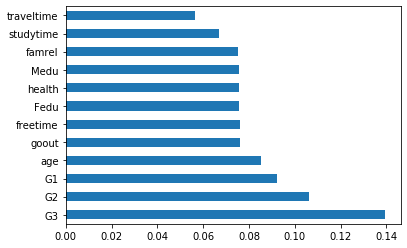

In [386]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [387]:
pr_results = sm.GLM(y_train, X_train, family = sm.families.Poisson()).fit()
print(pr_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               absences   No. Observations:                  311
Model:                            GLM   Df Residuals:                      299
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1182.2
Date:                Thu, 23 Apr 2020   Deviance:                       1602.5
Time:                        22:21:22   Pearson chi2:                 1.71e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
G3             0.2443      0.022     11.241      0.0

Test for the fit

In [406]:
n = len(X_train)
p = 12
degree_of_freedom = n-p
fitness = degree_of_freedom + 2*math.sqrt(2*degree_of_freedom)
fitness

347.90807704254996

In [389]:
pr_predictions = pr_results.get_prediction(X_test)
pr_summary = pr_predictions.summary_frame()
print(pr_summary)

          mean   mean_se  mean_ci_lower  mean_ci_upper
54    4.929375  0.453504       4.116053       5.903406
125   3.005674  0.299839       2.471884       3.654734
266   6.467070  0.477400       5.595923       7.473833
176   2.645052  0.215785       2.254201       3.103672
287   3.976412  0.288032       3.450122       4.582984
215   5.569009  0.405006       4.829190       6.422165
309   5.561653  0.414175       4.806346       6.435655
286   6.050108  0.497269       5.149929       7.107632
101   3.857188  0.264503       3.372100       4.412057
198   5.983134  0.591899       4.928573       7.263339
143   4.438439  0.417293       3.691493       5.336523
37    3.584684  0.358281       2.946967       4.360401
123   9.292309  0.892492       7.697839      11.217044
282   3.048893  0.307287       2.502377       3.714768
248   6.758057  0.578196       5.714734       7.991857
59    4.732620  0.400502       4.009294       5.586442
68    2.895170  0.222723       2.489958       3.366326
169   3.94

<function matplotlib.pyplot.show(*args, **kw)>

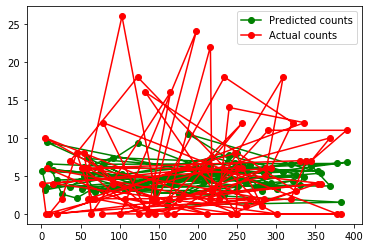

In [393]:
pred_counts = pr_summary['mean']
actual_counts = y_test
predicted, = plt.plot(X_test.index, pred_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show

<Figure size 432x288 with 0 Axes>

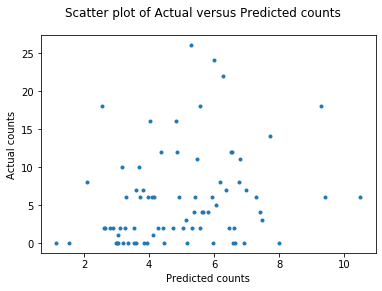

In [391]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=pred_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()